## Gather

In [81]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt

In [4]:
twitter_archive = pd.read_csv('Source_Files/twitter-archive-enhanced.csv')

folder_name = 'Source_Files'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content) 
        
image_predictions = pd.read_csv('Source_Files/image-predictions.tsv', sep = '\t')

In [5]:
consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_id = twitter_archive['tweet_id']
data = {}
data['twitter_data'] = []

for id_of_tweet in tweet_id:
    try:
        tweet = api.get_status(id_of_tweet, tweet_mode='extended')
        twitter_id = tweet._json['id']
        favorite_count = tweet._json['favorite_count']
        retweet_count = tweet._json['retweet_count']
        data['twitter_data'].append({'tweet_id' : twitter_id, 
                                    'favorite_count' : int(favorite_count), 
                                    'retweet_count' : int(retweet_count)}) 
        
    except:
        data['twitter_data'].append({'tweet_id' : 'id not found', 
                                    'favorite_count' : int(favorite_count), 
                                    'retweet_count' : int(retweet_count)})
        
with open('Source_Files/tweet_json.txt', 'w') as outfile:
    json.dump(data,outfile)

Rate limit reached. Sleeping for: 206
Rate limit reached. Sleeping for: 724


In [6]:
df_list = []
with open('Source_Files/tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweet in data['twitter_data']:
        df_list.append({'tweet_id': tweet['tweet_id'], 
                        'favorite_count': tweet['favorite_count'],
                        'retweet_count': tweet['retweet_count']})

In [7]:
tweet_archive = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweet_archive

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39381,8803
1,892177421306343426,33707,6451
2,891815181378084864,25393,4277
3,891689557279858688,42743,8889
4,891327558926688256,40902,9680
5,891087950875897856,20506,3222
6,890971913173991426,12029,2132
7,890729181411237888,66545,19485
8,890609185150312448,28140,4374
9,890240255349198849,32381,7648


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [152]:
image_predictions.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [116]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [ ]:
tweet_archive.info()

In [16]:
tweet_archive['tweet_id'].value_counts()

id not found          6
667495797102141441    1
710296729921429505    1
708130923141795840    1
736392552031657984    1
752519690950500352    1
758355060040593408    1
741303864243200000    1
870656317836468226    1
743835915802583040    1
676897532954456065    1
756275833623502848    1
763167063695355904    1
745314880350101504    1
757597904299253760    1
689623661272240129    1
746757706116112384    1
735635087207878657    1
732375214819057664    1
778396591732486144    1
748932637671223296    1
714141408463036416    1
725729321944506368    1
726887082820554753    1
715704790270025728    1
740699697422163968    1
760539183865880579    1
717421804990701568    1
741438259667034112    1
711998809858043904    1
                     ..
666454714377183233    1
708810915978854401    1
682389078323662849    1
699788877217865730    1
673612854080196609    1
710844581445812225    1
666437273139982337    1
667724302356258817    1
712092745624633345    1
676440007570247681    1
7157581512708014

## Assess

### Quality

##### `twitter_archive` table

- Erroneous datatypes(timestamp, retweeted_status_timestamp, rating_numerator).
- Irregular values in columns retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id.
- Rating is not provided for *810984652412424192, 832088576586297345*.
- Rating denominator is sometimes wrong because that particular instance has multiple ratings.
- Rating numerator is sometimes wrong because that particular instance has multiple ratings(666287406224695296, 695064344191721472, 674646392044941312, 691483041324204033).
- Some rating numerators are wrong because the rating is given in float.(883482846933004288, 681340665377193984,786709082849828864, 680494726643068929, 778027034220126208). 
- Multiple values in same rows of columns(doggo, pupper, puppo, floofer).

##### `image_predictions` table

- Duplicated images.

##### `tweet_archive` table

- Some tweets doesn't have a tweet id.

### Tidiness

- Retweets with ratings must be removed.
- One variable in four columns in twitter_archive table (dog_stage, doggo, floofer, puppo and pupper).
- tweet_archive table must be a part of twitter_archive table.
- Drop the columns which aren't necessary for analysis in the cleaned table.

## Clean

In [440]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_archive_clean = tweet_archive.copy()

### Tidiness

#### 1. Delete retweeted data in `twitter archive` table.
#### i. Irregular values in columns retweeted_status_id, retweeted_status_user_id.

##### Define
Remove the data which has been retweeted. Convert irregular values by changing NaN to zero(0) and changing the datatype into int.

##### Code

In [441]:
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.fillna(0).astype(int)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.fillna(0).astype(int)
twitter_archive_clean = twitter_archive_clean[~(twitter_archive_clean.retweeted_status_id != 0)]

##### Test

In [442]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null int64
retweeted_status_user_id      2175 non-null int64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(5), object

#### Delete retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in `twitter archive` table.

##### Define
Drop the columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). 

##### Code

In [443]:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', axis = 1)

##### Test

In [444]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### 2. One variable in four columns in `twitter_archive` table (dog_stage, doggo, floofer, puppo and pupper).
#### ii. Multiple values in same rows of columns(doggo, pupper, puppo, floofer).

##### Define
Combine the columns pupper, doggo, puppo and floofer to dog_stage column. Then drop the pupper, doggo, puppo and floofer columns.

##### Code

In [445]:
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace('None','')
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('None','')
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace('None','')
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace('None','')
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: ' '.join(x), axis=1)
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.str.strip()
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggo  pupper','doggo, pupper')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggo floofer','doggo, floofer')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggo   puppo','doggo, puppo')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('','None')

In [446]:
twitter_archive_clean = twitter_archive_clean.drop('doggo', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('floofer', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('pupper', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('puppo', axis = 1)

##### Test

In [447]:
twitter_archive_clean.dog_stage.value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [448]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


### Quality

####  iii. `twitter_archive`: Erroneous datatypes 
#### i. Irregular values in columns in_reply_to_status_id, in_reply_to_user_id.

##### Define
Convert timestamp to datetime data type. 
Convert in_reply_to_status_id and in_reply_to_status_id to int data type. Convert NaN to zero(0) so as to convert the data type into int.

##### Code

In [449]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(0).astype(int)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(0).astype(int)

##### Test

In [450]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 203.9+ KB


####  iv. `twitter_archive`: Rating not provided in some tweets.

##### Define
Remove tweets without ratings(810984652412424192, 832088576586297345).

##### Code

In [451]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 832088576586297345]

##### Test

In [452]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 832088576586297345]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [453]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


####  v. `twitter_archive`: Rating numerator is sometimes wrong because that particular instance has multiple ratings
#### vi. Some rating numerators are wrong because the rating is given in float
#### vii. Rating denominator is sometimes wrong because that particular instance has multiple ratings
#### iii. Erroneous datatypes (Rating numerator)

##### Define
Extract the *rating numerator* and *rating denominator* variables from the *text* column using regular expressions and pandas' `str.extract` method. Drop any intermediate columns.

##### Code

In [454]:
twitter_archive_clean['text_rev'] = twitter_archive_clean.text.apply(lambda x : ', '.join(reversed(x.split(' '))))
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.text_rev.str.extract('(\d{1,}(?=\/)|\d{1,}\.\d{1,}(?=\/))',expand=True )
twitter_archive_clean['rating_denominator'] = twitter_archive_clean.text.str.extract('((\d{2,3})(?!\/)|(\d{2,3})(?=\s.,)(?!\d))', expand=True)

In [455]:
twitter_archive_clean = twitter_archive_clean.drop('text_rev', axis = 1)

In [456]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(int)

##### Test

In [457]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
695,786709082849828864,0,0,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None


In [458]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 691483041324204033]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1508,691483041324204033,0,0,2016-01-25 04:49:38,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10.0,10,None,None


In [459]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2173 non-null int64
in_reply_to_status_id    2173 non-null int64
in_reply_to_user_id      2173 non-null int64
timestamp                2173 non-null datetime64[ns]
source                   2173 non-null object
text                     2173 non-null object
expanded_urls            2116 non-null object
rating_numerator         2173 non-null float64
rating_denominator       2173 non-null int64
name                     2173 non-null object
dog_stage                2173 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 203.7+ KB


#### viii. `image_predictions`: Duplicated images

##### Define
Remove the duplicated images.

##### Code

In [460]:
image_predictions_clean = image_predictions_clean[~(image_predictions_clean.jpg_url.duplicated())]

##### Test

In [461]:
image_predictions_clean[image_predictions_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [462]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### ix. `tweet_archive`: tweet ID missing

##### Define
Drop rows without tweet_id.

##### Code

In [463]:
tweet_archive_clean = tweet_archive_clean[~(tweet_archive_clean.tweet_id.duplicated())]

##### Test

In [464]:
tweet_archive_clean['tweet_id'].value_counts()

667495797102141441    1
759557299618865152    1
676897532954456065    1
735635087207878657    1
708130923141795840    1
736392552031657984    1
752519690950500352    1
758355060040593408    1
741303864243200000    1
870656317836468226    1
710296729921429505    1
743835915802583040    1
756275833623502848    1
763167063695355904    1
745314880350101504    1
757597904299253760    1
689623661272240129    1
732375214819057664    1
748932637671223296    1
749075273010798592    1
760539183865880579    1
691820333922455552    1
714141408463036416    1
725729321944506368    1
726887082820554753    1
715704790270025728    1
740699697422163968    1
717421804990701568    1
746507379341139972    1
741438259667034112    1
                     ..
666454714377183233    1
708810915978854401    1
682389078323662849    1
699788877217865730    1
673612854080196609    1
710844581445812225    1
666437273139982337    1
667724302356258817    1
712092745624633345    1
676440007570247681    1
7157581512708014

### Tidiness

#### 3. tweet_archive table must be a part of twitter_archive table.

##### Define
Merge tweet_archive_clean table with twitter_archive_clean table.

##### Code

In [465]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_archive_clean,
                                on = ['tweet_id'], how = 'left')

##### Test

In [466]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,39381,8803
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33707,6451
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25393,4277
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42743,8889
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,40902,9680


#### 4. Drop columns which aren't necessary for analysis in `image_predictions` table.

##### Define
Drop img_num column in image_predictions table.

##### Code

In [467]:
image_predictions_clean = image_predictions_clean.drop('img_num', axis = 1)

##### Test

In [468]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


In [469]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 5. Drop columns which aren't necessary for analysis like in_reply_to_status_id, in_reply_to_user_id, expanded_urls, timestamp and source in `twitter archive` table.

##### Define
Drop columns in_reply_to_status_id, in_reply_to_user_id, expanded_urls, timestamp and source in twitter archive table.

##### Code

In [470]:
twitter_archive_clean = twitter_archive_clean.drop('in_reply_to_status_id', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('in_reply_to_user_id', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('expanded_urls', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis = 1)
twitter_archive_clean = twitter_archive_clean.drop('source', axis = 1)

##### Test

In [471]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 8 columns):
tweet_id              2173 non-null object
text                  2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null int64
name                  2173 non-null object
dog_stage             2173 non-null object
favorite_count        2173 non-null int64
retweet_count         2173 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 152.8+ KB


In [472]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,39381,8803
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,33707,6451
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,25393,4277
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,42743,8889
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,40902,9680


#### 6. Merge columns from `image predictions` which are necessary for analysis to `twitter archive` table.

##### Define
Merge columns p2, p2_conf and p2_dog from image predictions table to twitter archive table.
p2_dog has more True values than p1_dog and p3_dog

##### Code

In [473]:
twitter_archive_clean = pd.merge(twitter_archive_clean, 
                                 image_predictions_clean[['tweet_id', 'p2', 'p2_conf', 'p2_dog']], 
                                 on='tweet_id', how='left')
twitter_archive_clean = twitter_archive_clean.rename(columns = {'p2' : 'p', 'p2_conf' : 'p_conf', 'p2_dog' : 'p_dog'})

##### Test

In [474]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 11 columns):
tweet_id              2173 non-null object
text                  2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null int64
name                  2173 non-null object
dog_stage             2173 non-null object
favorite_count        2173 non-null int64
retweet_count         2173 non-null int64
p                     1993 non-null object
p_conf                1993 non-null float64
p_dog                 1993 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.7+ KB


In [475]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,p,p_conf,p_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,39381,8803,bagel,0.085851,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,33707,6451,Pekinese,0.090647,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,25393,4277,malamute,0.078253,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,42743,8889,Labrador_retriever,0.168086,True
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,40902,9680,English_springer,0.225770,True


## Storing 

In [476]:
twitter_archive_clean.to_csv('Source_Files/twitter_archive_master.csv', index=False)
image_predictions_clean.to_csv('Source_Files/image_predictions_master.csv', index=False)

In [2]:
twitter_archive_master = pd.read_csv('Source_Files/twitter_archive_master.csv')
image_predictions_master = pd.read_csv('Source_Files/image_predictions_master.csv')

In [61]:
twitter_archive_master.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,p,p_conf,p_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,39381,8803,bagel,0.085851,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,33707,6451,Pekinese,0.090647,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,25393,4277,malamute,0.078253,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,42743,8889,Labrador_retriever,0.168086,True
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,40902,9680,English_springer,0.225770,True


In [4]:
image_predictions_master.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Analysis

##### 1. rating_numerator 

In [93]:
twitter_archive_master.rating_numerator.describe()

count    2173.000000
mean       12.718491
std        43.176886
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Text(0,0.5,'Count')

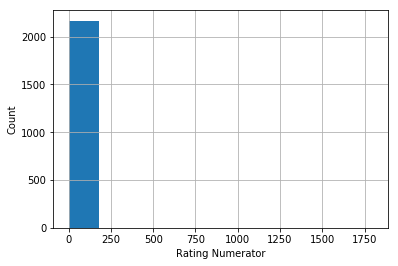

In [94]:
%matplotlib inline

twitter_archive_master.rating_numerator.hist(bins = 10, range=[0, 1800], align='mid')
plt.xlabel('Rating Numerator')
plt.ylabel('Count')

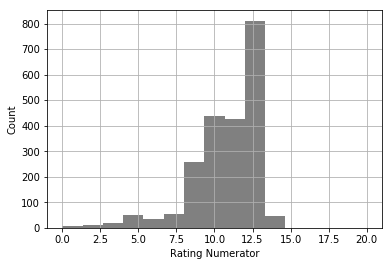

In [95]:
%matplotlib inline
plt.xlabel('Rating Numerator')
plt.ylabel('Count')
twitter_archive_master.rating_numerator.hist(bins = 15, range=[0, 20], facecolor='gray', align='mid')

As we can observe the 75% quantile of rating_numerator is 12. But the maximum value is 1776. This indicates that the rating numerator has some outliers in the top 25% quantile. So we don't have to pay attention to them. On viewing the histogram of rating_numerator we can see confirm our suspicion of the outliers being present. It shows that maximum of values lies between 10 and 13 which explains the mean value of 12.718491.

##### 2. rating_denominator

In [96]:
twitter_archive_master.rating_denominator.describe()

count    2173.000000
mean       11.878969
std        17.060492
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       400.000000
Name: rating_denominator, dtype: float64

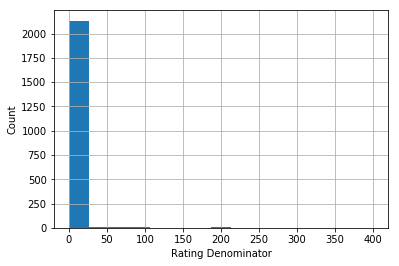

In [97]:
%matplotlib inline
plt.xlabel('Rating Denominator')
plt.ylabel('Count')
twitter_archive_master.rating_denominator.hist(bins = 15, range=[0, 400], align='mid')

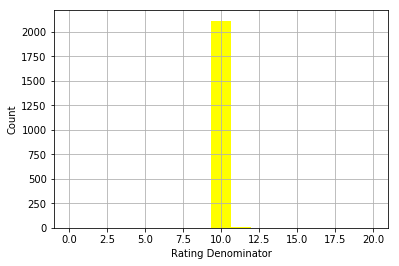

In [98]:
%matplotlib inline
plt.xlabel('Rating Denominator')
plt.ylabel('Count')
twitter_archive_master.rating_denominator.hist(bins = 15, range=[0, 20], facecolor='yellow', align='mid')

We can see that 75% quantile of rating_denominator is equal to it's 25% quantile. So most of the values is a constant 10. There are indeed some deviations and a limited number of outliers which we can observe from the mean and max of the rating_denominator. The above two plots confirm our predictions.

##### 3. rating_numerator and favourite_count: Most common rating

In [99]:
rate_1 = twitter_archive_master.where(twitter_archive_master.rating_numerator >= 10)
rate_2 = rate_1.where(twitter_archive_master.rating_numerator <= 20)
num_rate = rate_2.groupby(['rating_numerator'])['favorite_count'].sum() 

We left out the rating less than 10 and greater than 100. Ratings greater than 20 is usually an outlier and ratings less than 10 is so low that we can ignore them.

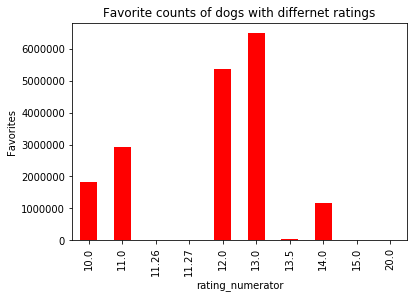

In [102]:
%matplotlib inline
plt.ylabel('Favorites')
plt.xlabel('Rating Numerator')
num_rate.plot(kind = 'bar',
             title = 'Favorite counts of dogs with differnet ratings',
           color = 'red')

Dogs with a rating of 12 and 13 has the most favorite counts. This states that the common rating for a good dog in WeRateDogs is 13. And that is why the favorite count is at peak in 13. 

##### 4. rating_numerator, favorite_counts and p_dog: Most popular dog breed

Since we found out that the common rating_numerator is 13, we can now see which dog types are popular with a rating of 13.

In [103]:
rating = twitter_archive_master.where(twitter_archive_master.rating_numerator == 13)
rating_1 = rating.where(rating.p_dog == True)
rating_1.favorite_count.describe()

count       204.000000
mean      23236.730392
std       20260.761971
min         609.000000
25%       10694.000000
50%       19434.000000
75%       28497.750000
max      132000.000000
Name: favorite_count, dtype: float64

In [104]:
rating_2 = rating_1.where(rating_1.favorite_count > 28497)
rating_2.favorite_count.describe()

count        51.000000
mean      48717.392157
std       24555.073847
min       28923.000000
25%       34477.500000
50%       37953.000000
75%       53327.500000
max      132000.000000
Name: favorite_count, dtype: float64

In [105]:
rating_3 = rating_2.where(rating_2.favorite_count > 37953)
dog = rating_3.groupby(['p'])['favorite_count'].sum() 

We started by finding those entries in twitter archive master table whose rating numerator is equal to 13. We extracted entries from that dataframe whose predictions are True. Then we found out that the top 25% quantile of favorite count starts from 28497. From those entries we obtained the top 50% quantile of favorite count and assigned them with value greater than that in a final dataframe which we grouped with the dog type(p).

Text(0.5,0,'Dog Breed')

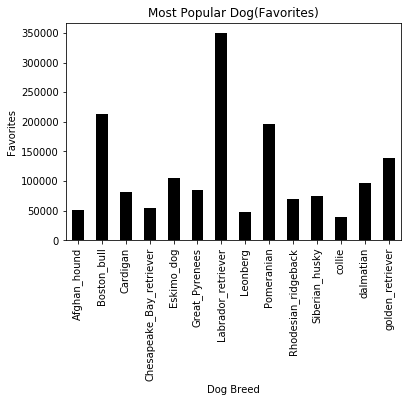

In [107]:
%matplotlib inline
dog.plot(kind = 'bar',
         title = 'Most Popular Dog(Favorites)',
         color = 'black')
plt.ylabel('Favorites')
plt.xlabel('Dog Breed')

From the above visualization, it is evident that the Labrador Retriever is the most popular dog. It has the most favorite counts(more than 400,000). It is followed by Boston Bull, Pomeranian and Golden Retriever

#####  5. rating_numerator, retweet_counts and p_dog : Most popular dog breed II

In [108]:
ratingr = twitter_archive_master.where(twitter_archive_master.rating_numerator == 13)
rating_1r = ratingr.where(ratingr.p_dog == True)
rating_1r.retweet_count.describe()

count      204.000000
mean      6887.107843
std       8403.112491
min        125.000000
25%       2538.000000
50%       4305.000000
75%       7695.250000
max      60513.000000
Name: retweet_count, dtype: float64

In [109]:
rating_2r = rating_1r.where(rating_1r.retweet_count > 7695)
rating_2r.retweet_count.describe()

count       51.000000
mean     16767.960784
std      11995.341027
min       7720.000000
25%       9799.000000
50%      11757.000000
75%      18775.000000
max      60513.000000
Name: retweet_count, dtype: float64

In [110]:
rating_3r = rating_2r.where(rating_2r.retweet_count > 11757)
dog_1 = rating_3r.groupby(['p'])['retweet_count'].sum()

We started by finding those entries in twitter archive master table whose rating numerator is equal to 13. We extracted entries from that dataframe whose predictions are True. Then we found out that the top 25% quantile of favorite count starts from 7695. From those entries we obtained the top 50% quantile of favorite count and assigned them with value greater than that in a final dataframe which we grouped with the dog type(p).

Text(0,0.5,'Retweets')

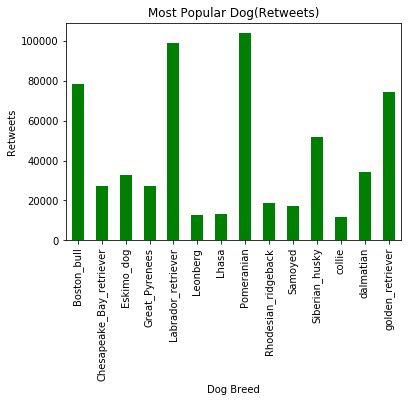

In [111]:
%matplotlib inline
dog_1.plot(kind = 'bar',
             title = 'Most Popular Dog(Retweets)',
          color = 'green')
plt.xlabel('Dog Breed')
plt.ylabel('Retweets')

The top 4 remained the same as in the previous visualization. But as we ca see Pomeranian has got the most number of retweets(more than 100,000). It is closely followed by our popular dog based on favorite counts 'Labrador Retriever'. Boston Bull and Gloden Retriever follows them.